# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats

In [3]:
X=pd.read_excel("PERIMETER.xlsx")

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   num        569 non-null    int64  
 1   id         569 non-null    int64  
 2   diagnosis  569 non-null    object 
 3   perimeter  569 non-null    float64
 4   var        569 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 22.4+ KB


In [5]:
X.head()

,num,id,diagnosis,perimeter,var
0,102,862722,B,43.79,P
1,569,92751,B,47.92,P
2,539,921092,B,47.98,P
3,540,921362,B,48.34,P
4,47,85713702,B,51.71,P


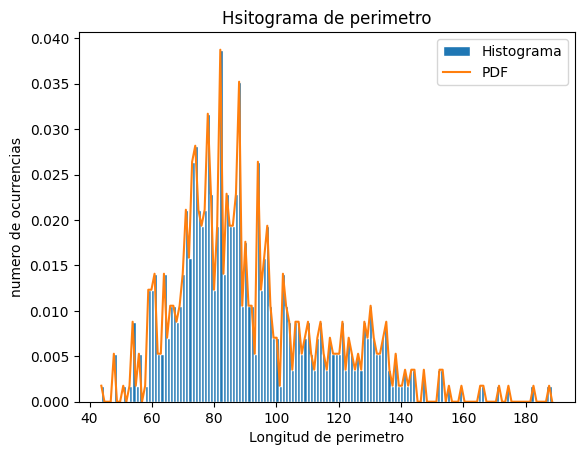

Probabilidad de que perimetro = 88:  0.035


In [32]:
perimeter=X["perimeter"]
min_perimeter, max_perimeter=min(perimeter),max(perimeter)
n_bins=math.ceil((max_perimeter - min_perimeter))

hist=np.histogram(perimeter, bins=n_bins)
hist_dis=stats.rv_histogram(histogram=hist, density=True)

_,_,z=plt.hist(perimeter, bins=n_bins, edgecolor='white' , density=True, label="Histograma") 
eje_x=np.linspace(min_perimeter, max_perimeter, n_bins)
plt.plot(eje_x, hist_dis.pdf(eje_x), label="PDF")

plt.title("Hsitograma de perimetro")
plt.xlabel("Longitud de perimetro")
plt.ylabel("numero de ocurrencias")
#plt.bar_label(z)
plt.legend()
plt.show()

print(f"Probabilidad de que perimetro = 88:  {hist_dis.pdf(88.59):.3f}")

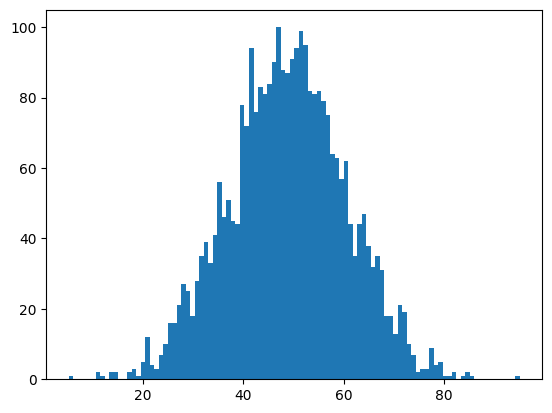

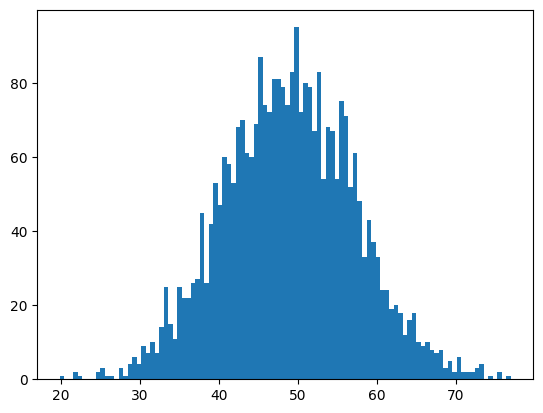

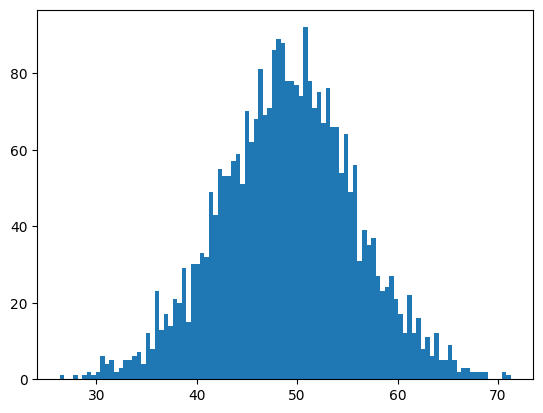

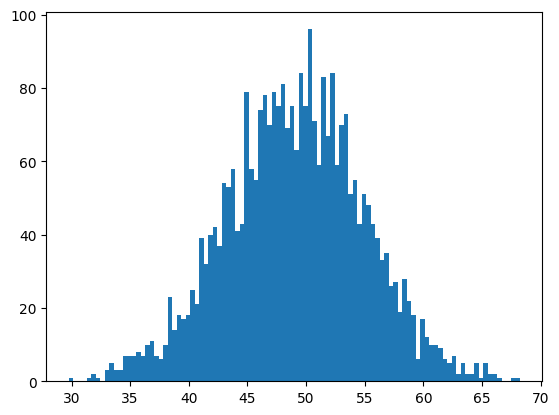

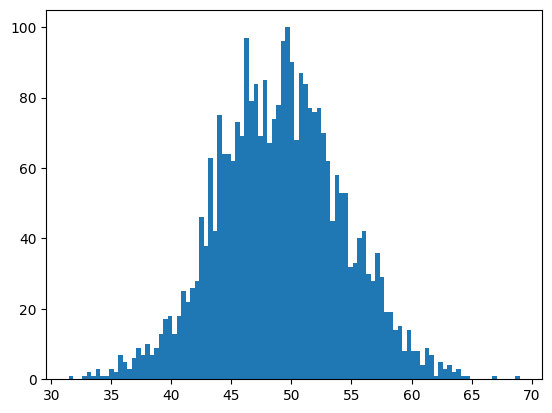

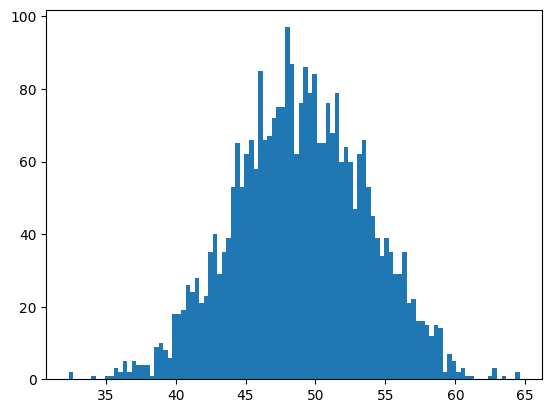

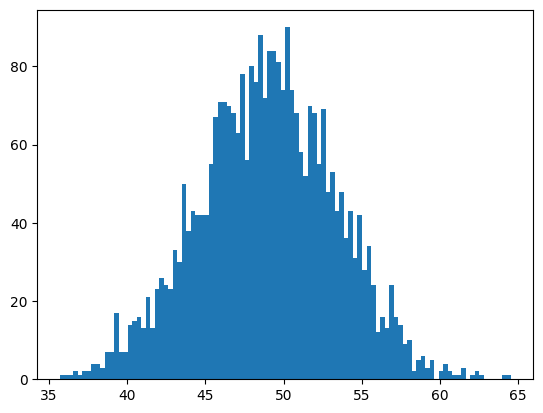

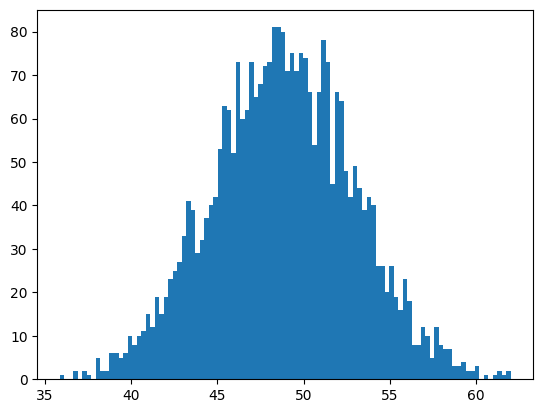

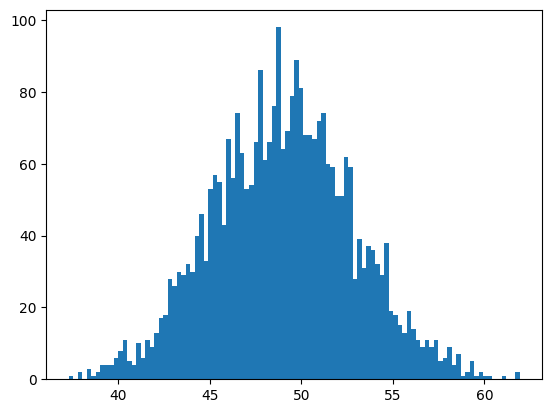

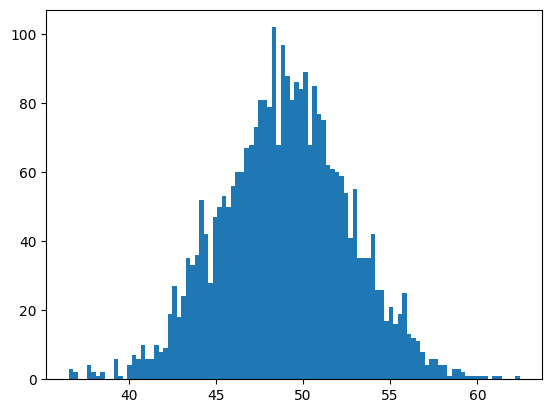

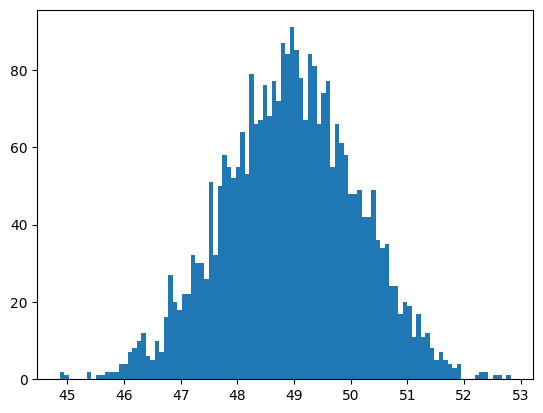

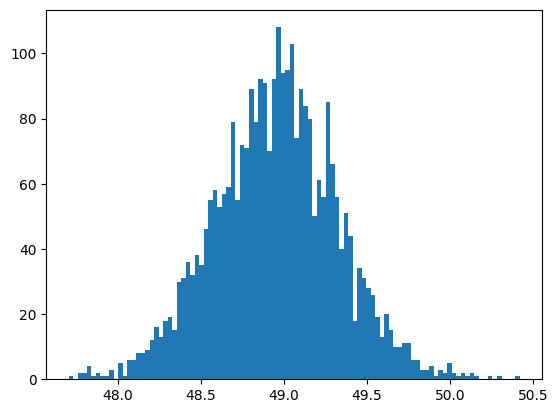

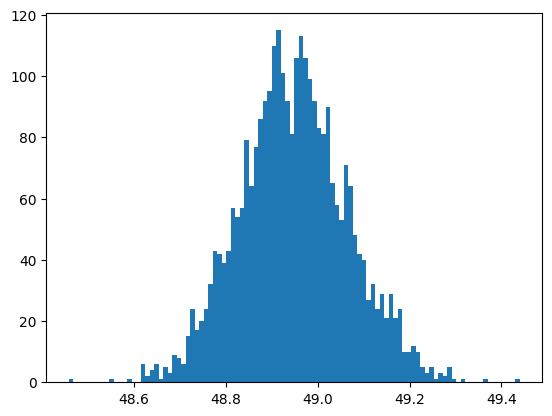

In [33]:
def datos_sesgados(sesgo,cantidad, maximo):
    aleatorios=stats.skewnorm.rvs(sesgo,
                                  size=cantidad
                                  ,random_state=1)
    aleatorios=(aleatorios+abs(aleatorios.min()))
    aleatorios=aleatorios/aleatorios.max()*maximo
    return aleatorios

datos=datos_sesgados(0,100000,100)

tamano_muestra=[1,2,3,4,5,6,7,8,9,10,100,1000,10000]
num_muestras=3000

for tamano in tamano_muestra:
    promedios=np.array([])
    for i in range(num_muestras):
        promedios=np.append(promedios
                            ,np.random.choice(datos, tamano).mean())
    plt.hist(promedios,bins=100, alpha=1)
    plt.show()